In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0.5, 1.0, 'No. of people died at different age due to heart desease')

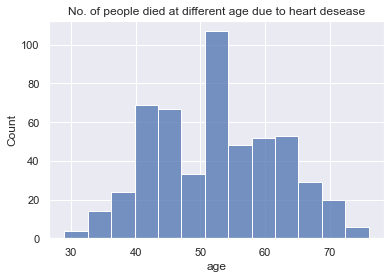

In [8]:
dead = df.age.where(df.target == 1)
sns.histplot(dead)
plt.title("No. of people died at different age due to heart desease")

##### From this plot we can see that people between the ages of 50 to 55 have died the most

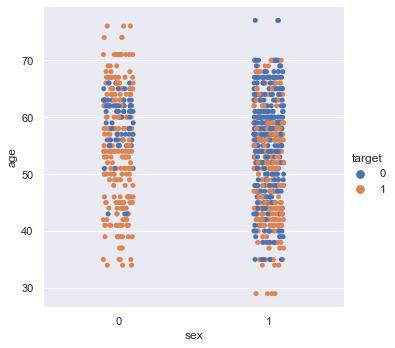

In [9]:
sns.catplot(x = "sex" , y = "age" , hue = "target" , data = df);

###### From this plot we can see that the death rate of male is much higher than that of female

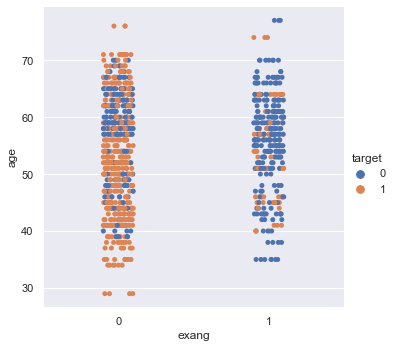

In [10]:
sns.catplot(x = "exang", y = "age" , hue = "target" , data = df)

###### From this plot we understand that those who exercised had a much lower mortality rate than those who did not exercise.

###  Start Logistic regression model.

In [11]:
x = df.drop(columns = ["target"])
y = df.target

In [12]:
s_scale = StandardScaler()
x_scaled = s_scale.fit_transform(x)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y , test_size = 0.20 , random_state = 50)

In [14]:
l_reg = LogisticRegression()
l_reg.fit(x_train, y_train)

LogisticRegression()

In [15]:
my_pred = l_reg.predict(x_test)

In [16]:
accuracy_score(y_test, my_pred)

0.824390243902439

In [26]:
conf_mat = confusion_matrix(y_test, my_pred)
conf_mat

array([[ 69,  25],
       [ 11, 100]], dtype=int64)

###### For confusion matrix it shows that we got total 169 right predictions( 69(true positive) and 100(true negative) )
###### and we got 25(false positive) and 11(false negative)

In [27]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [28]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.824390243902439

In [31]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7340425531914894

In [32]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8625

In [33]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7931034482758621

In [18]:
auc = roc_auc_score(y_test, my_pred)

In [19]:
auc

0.8174717270461952

### AUC Ploting

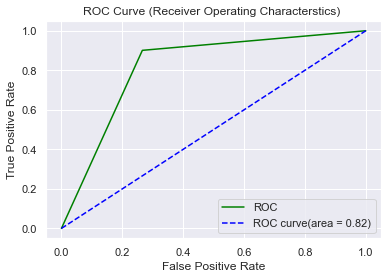

In [20]:
fpr, tpr , thresholds = roc_curve(y_test, my_pred)

plt.plot(fpr, tpr , color = "green" , label = "ROC")
plt.plot([0 , 1] , [0 , 1] , color = "blue" , linestyle = "--" , label = "ROC curve(area = %0.2f)"% auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Receiver Operating Characterstics) ")
plt.legend()
plt.show()

In [21]:
f1_score(y_test, my_pred)

0.8474576271186441

##### The score of F1 indicates whether our model has overfitting, the higher the value of F1 the better the result of our model which means less overfitting.

In [22]:
print(classification_report(y_test, my_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        94
           1       0.80      0.90      0.85       111

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205

